<a href="https://colab.research.google.com/github/Noushad-Tanvir/DIU-Web-App/blob/main/Rock_vs_Mine_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Load the Dataset

In [ ]:
# Direct URL from UCI repository (no header, comma-separated)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data'
ionosphere_data = pd.read_csv(url, header=None)

print("Ionosphere Dataset loaded successfully!")
print("Shape:", ionosphere_data.shape)
print("\nClass distribution (g = good, b = bad):")
print(ionosphere_data[34].value_counts())

Ionosphere Dataset loaded successfully!
Shape: (351, 35)

Class distribution (g = good, b = bad):
34
g    225
b    126
Name: count, dtype: int64


Separate Features and Labels

In [ ]:
X = ionosphere_data.drop(columns=34, axis=1)  # Columns 0–33: features
y = ionosphere_data[34]                       # Column 34: label ('g' or 'b')

Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"\nTraining samples: {X_train.shape[0]}")
print(f"Test samples:     {X_test.shape[0]}")


Training samples: 280
Test samples:     71


Feature Scaling (Essential!)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 Tuning with GridSearchCV

In [ ]:
print("\nRunning GridSearchCV to find the best parameters...")

param_grid = {
    'C': [1, 5, 10, 20, 50],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

grid_search = GridSearchCV(
    SVC(kernel='rbf', random_state=42),
    param_grid,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", f"{grid_search.best_score_:.4f}")


Running GridSearchCV to find the best parameters...
Best parameters found: {'C': 5, 'gamma': 0.1}
Best cross-validation accuracy: 0.9643


In [ ]:
# Use the best model
model = grid_search.best_estimator_

Evaluation

In [ ]:
# Predictions
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)

In [ ]:
# Accuracies
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print(f"\n{'='*60}")
print(f"FINAL RESULTS WITH BEST MODEL")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy:     {test_accuracy:.4f}")
print(f"{'='*60}")


FINAL RESULTS WITH BEST MODEL
Training Accuracy: 0.9964
Test Accuracy:     0.9437


In [ ]:
# Detailed report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, test_pred))


Classification Report (Test Data):
              precision    recall  f1-score   support

           b       0.89      0.96      0.92        25
           g       0.98      0.93      0.96        46

    accuracy                           0.94        71
   macro avg       0.93      0.95      0.94        71
weighted avg       0.95      0.94      0.94        71



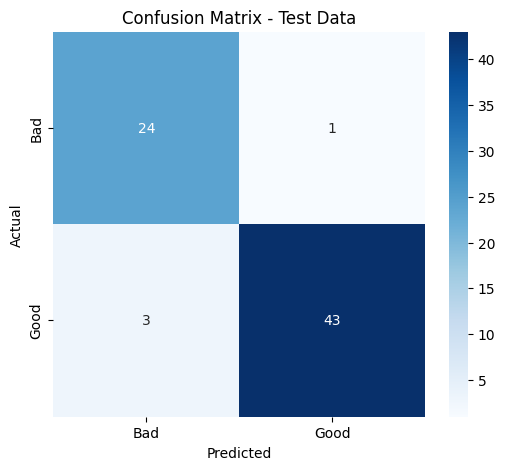

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, test_pred, labels=['b', 'g'])
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bad', 'Good'],
            yticklabels=['Bad', 'Good'])
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

7. Cross-Validation (More Reliable Score)

In [ ]:
X_full_scaled = scaler.fit_transform(X)
cv_scores = cross_val_score(model, X_full_scaled, y, cv=10, scoring='accuracy')

print(f"\n10-Fold Cross-Validation (Full Data):")
print(f"Mean Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


10-Fold Cross-Validation (Full Data):
Mean Accuracy: 0.9543 ± 0.0343


Prediction Function for New Samples

In [ ]:
def predict_ionosphere(input_data):
    """
    Predict radar return quality.
    Input: list/tuple/array of 34 feature values
    """
    input_array = np.asarray(input_data).reshape(1, -1)
    input_scaled = scaler.transform(input_array)
    prediction = model.predict(input_scaled)[0]

    return "Good radar return" if prediction == 'g' else "Bad radar return"

Example Prediction

In [ ]:
sample_data = X.iloc[0].values
print("\nExample Prediction (First sample in dataset):")
print(f"Predicted: {predict_ionosphere(sample_data)}")
print(f"Actual:    {'Good' if y.iloc[0] == 'g' else 'Bad'} radar return")


Example Prediction (First sample in dataset):
Predicted: Good radar return
Actual:    Good radar return


Bonus: Check First Few Test Samples

In [ ]:
print("\nPredictions on first 5 test samples:")
for i in range(min(5, len(X_test))):
    actual = y_test.iloc[i]
    predicted = predict_ionosphere(X_test.iloc[i].values)
    print(f"Sample {i+1}: {predicted} | Actual: {'Good' if actual == 'g' else 'Bad'} radar return")


Predictions on first 5 test samples:
Sample 1: Good radar return | Actual: Good radar return
Sample 2: Good radar return | Actual: Good radar return
Sample 3: Good radar return | Actual: Good radar return
Sample 4: Good radar return | Actual: Good radar return
Sample 5: Bad radar return | Actual: Good radar return
